# Analysis

We want to analyze the behaviour of the solver according to different
distributions of the bricks' height.
Let's consider three distributions:
* uniform distribution in $(0,10)$
* gaussian distribution with mean 10 and standard deviation 1;
* multimodal distribution.

In [1]:
from _solver import GeneticBrickSolver
import matplotlib.pyplot as plt
import numpy as np
random_seed = 123
np.random.seed(random_seed)

To compare the performance of the solver we will set the parameters as
follows:

In [2]:
population_size = 25
max_generations = 500

mutation_rate = 0.1
crossover_rate = 0.8
k_elitism = population_size//10
tournament_size = population_size//10

columns_per_individual = 10
bricks_per_column = 15
number_of_bricks = columns_per_individual*bricks_per_column

We need a metric that allows us to compare the performance of the solver on different sets of bricks.

The fitness of the best individual found is not an appropriate metric to compare solutions of different problems because it is not scale invariant (i.e. we find always a better fitness value if we just devide by a factor $\lambda$ the bricks' height).

Let's define the following fitness function:
$$
    f_{\text{norm}}(C_1,\dots, C_{n}) 
    = \frac{f(C_1,\dots, C_{n})}{\bar{h}} 
    = \frac{H_{max} -  H_{min}}{\bar{h}} 
$$
where $f$ is the original fitness function of the problem, $H_{max}$ and $H_{max}$ are respectively the highest column the lowest column of the individual that contains tha columns $C_1,\dots, C_{n}$ and $\bar{h}$ is the mean height of the bricks.

## Uniform Distribution

In [7]:
n_iterations = 20

Generate uniformly distributed random heights for the bricks from the range $(0, 10)$

In [8]:
f_norm_values = []
for _ in range(n_iterations):
    unif_brick_heights = np.random.uniform(0, 10, number_of_bricks)
    GBS = GeneticBrickSolver(population_size,
                             mutation_rate, 
                             crossover_rate, 
                             max_generations, 
                             tournament_size, 
                             k_elitism,
                             None)
    
    GBS.solve(unif_brick_heights,
              columns_per_individual,
              bricks_per_column)
    
    f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

mean_f_norm, std_f_norm = np.mean(f_norm_values), np.std(f_norm_values)

print("\n")
print("Uniform distribution")
print("Mean f_norm: ", mean_f_norm)
print("Standard deviation of f_norm: ", std_f_norm)
print("\n")


Generation 500/500

Uniform distribution
Mean f_norm:  0.2373574906535565
Standard deviation of f_norm:  0.07529466131557033




## Gaussian Distribution

Generate gaussian distributed random heights for the bricks from the range with mean 10 and standard deviation 1

In [9]:
f_norm_values = []
for _ in range(n_iterations):
    gaus_brick_heights = np.random.normal(10, 1, number_of_bricks)
    
    GBS = GeneticBrickSolver(population_size,
                             mutation_rate,
                             crossover_rate,
                             max_generations,
                             tournament_size,
                             k_elitism,
                             None)
    
    GBS.solve(gaus_brick_heights,
              columns_per_individual,
              bricks_per_column)
    
    f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

mean_f_norm, std_f_norm = np.mean(f_norm_values), np.std(f_norm_values)

print("\n")
print("N(10,1) distribution")
print("Mean f_norm: ", mean_f_norm)
print("Standard deviation of f_norm: ", std_f_norm)
print("\n")


Generation 500/500

N(10,1) distribution
Mean f_norm:  0.042041439254238096
Standard deviation of f_norm:  0.015092554829115833




# Multimodal distribution

Generate multimodal distributed random heights for the bricks from the range with mean 10 and standard deviation 1

In [10]:
f_norm_values = []
for _ in range(n_iterations):
    bimod_brick_heights = np.concatenate(
        (np.random.normal(5, 1, number_of_bricks//2), 
         np.random.normal(15, 1, number_of_bricks//2)))
    
    GBS = GeneticBrickSolver(population_size,
                             mutation_rate,
                             crossover_rate,
                             max_generations,
                             tournament_size,
                             k_elitism,
                             None)
    
    GBS.solve(bimod_brick_heights,
              columns_per_individual,
              bricks_per_column)
    
    f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

mean_f_norm, std_f_norm = np.mean(f_norm_values), np.std(f_norm_values)

print("\n")
print("N((5,15), (1,1)) distribution")
print("Mean f_norm: ", mean_f_norm)
print("Standard deviation of f_norm: ", std_f_norm)
print("\n")

Generation 500/500

N((5,15), (1,1)) distribution
Mean f_norm:  0.288397260013888
Standard deviation of f_norm:  0.1040909109726668




# Uniform vs Gaussian distribution

Compare the performance of the solver on uniform distribution data and gaussian distribution data as the number of bricks per column increases


In [11]:

population_size = 20
max_generations = 100

mutation_rate = 0.1
crossover_rate = 0.8
k_elitism = population_size//10
tournament_size = population_size//10
columns_per_individual = 10

unif_f_norm_values = []
gaus_f_norm_values = []
mult_f_norm_values = []

range_bpc = range(5, 100, 5)

for bricks_per_column in range_bpc:
    
    ### Uniform Distribution Case
    number_of_bricks = columns_per_individual*bricks_per_column

    unif_brick_heights = np.random.uniform(0, 10, number_of_bricks)
    
    GBS = GeneticBrickSolver(population_size,
                             mutation_rate,
                             crossover_rate,
                             max_generations,
                             tournament_size,
                             k_elitism,
                             random_seed)
    
    GBS.solve(unif_brick_heights,
              columns_per_individual,
              bricks_per_column)
    
    unif_f_norm_values.append(GBS.fitness_norm(GBS.best_individual))


    ### Gaussian Distribution Case
    gaus_brick_heights = np.random.normal(10, 1, number_of_bricks)

    GBS = GeneticBrickSolver(population_size,
                             mutation_rate,
                             crossover_rate,
                             max_generations,
                             tournament_size,
                             k_elitism,
                             random_seed)
    
    GBS.solve(gaus_brick_heights,
              columns_per_individual,
              bricks_per_column)
    
    gaus_f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

    ### Bi-Modal Gaussian Distribution Case
    bimod_brick_heights = np.concatenate(
        (np.random.normal(5, 1, number_of_bricks//2), 
         np.random.normal(15, 1, number_of_bricks//2)))
    
    GBS = GeneticBrickSolver(population_size,
                             mutation_rate,
                             crossover_rate,
                             max_generations,
                             tournament_size,
                             k_elitism,
                             random_seed)
    
    GBS.solve(bimod_brick_heights,
                columns_per_individual,
                bricks_per_column)
    
    mult_f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

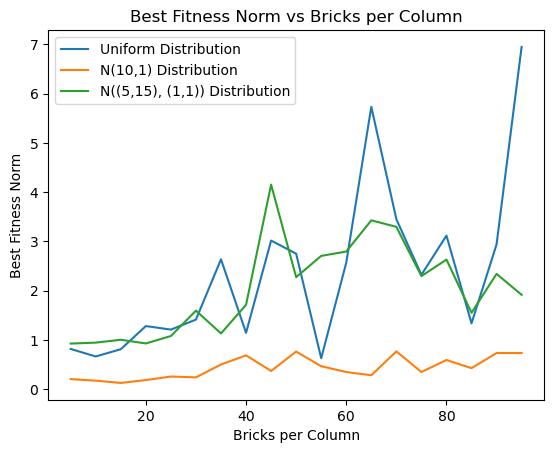

In [14]:
plt.figure()
plt.plot(range_bpc, unif_f_norm_values, label="Uniform Distribution")
plt.plot(range_bpc, gaus_f_norm_values, label="N(10,1) Distribution")
plt.plot(range_bpc, mult_f_norm_values, label="N((5,15), (1,1)) Distribution")
plt.legend()
plt.title("Best Fitness Norm vs Bricks per Column")
plt.xlabel("Bricks per Column")
plt.ylabel("Best Fitness Norm")
plt.show()
